In [1]:
#Imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Create dummy dataframe
df = pd.DataFrame({'group_one': [4, 5, 2, 3, 6, 6, 8, 4, 3, 2],
                   'group_two': [7, 4, 5, 9, 7, 6, 8, 5, 7, 6]})

df

,group_one,group_two
0,4,7
1,5,4
2,2,5
3,3,9
4,6,7
5,6,6
6,8,8
7,4,5
8,3,7
9,2,6


(array([1., 0., 2., 0., 2., 0., 3., 0., 1., 1.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <BarContainer object of 10 artists>)

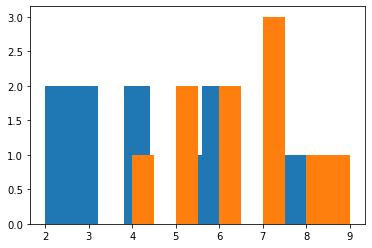

In [3]:
#How can I remove the messy text above the chart?
plt.hist(df['group_one'])
plt.hist(df['group_two'])

In [4]:
#Is this the correct test to use?
t, p = stats.ttest_1samp(df['group_one'], df['group_two'].mean())
t, p

(-3.4116412747654596, 0.0077295063200888865)

Are these hypotheses correct?

<b>Null hypothesis:</b> Group one has a distribution of smaller values than group two.  
<b>Alternative hypothesis:</b> Group one has the same distribution of values as group two.

In [5]:
#Running the correct test for the data
t, p = stats.ttest_ind(df['group_one'], df['group_two'])
t, p

(-2.6986235023321523, 0.014694555432773941)

In [6]:
#Am I interpreting the results correctly?
alpha = 0.5

if p < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


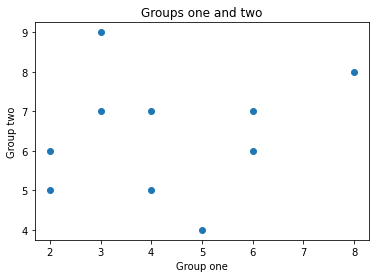

In [7]:
#Graph the data
plt.scatter(df['group_one'], df['group_two'])
plt.xlabel('Group one')
plt.ylabel('Group two')
plt.title('Groups one and two')
plt.show()

In [8]:
#Running a correlation test
r, p = stats.pearsonr(df['group_one'], df['group_two'])
r, p

(0.18199060308198098, 0.614821046147319)

Is my takeaway accurate?

Given the results of the statistical test, there appears to be some positive correlation between groups one and two.

In [9]:
#Creating some categorical columns
df['group_one_big'] = df['group_one'] > 5
df['group_two_small'] = df['group_two'] <= 5
df

,group_one,group_two,group_one_big,group_two_small
0,4,7,False,False
1,5,4,False,True
2,2,5,False,True
3,3,9,False,False
4,6,7,True,False
5,6,6,True,False
6,8,8,True,False
7,4,5,False,True
8,3,7,False,False
9,2,6,False,False


In [10]:
#Running my chi2 test
chi2, p, degf, expected = stats.chi2_contingency(df['group_one_big'], ['group_two_small'])

ValueError: The internally computed table of expected frequencies has a zero element at (0,).